# <center>MACHINE LEARNING - 2CS501</center>

# <center>INNOVATIVE ASSIGNMENT</center>

<h2><center>19BCE284 - Tulsi Patel<br></center><h2>

# Abalone - EDA, Regression, Classification

## Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

Dataset Link: http://archive.ics.uci.edu/ml/datasets/Abalone

## Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

| Sr. No. | Name | Data Type | Measurement Unit | Description |
| :- | :- | :- | :- | :- |
| 1. | Sex | nominal | -- | M, F, and I (infant) |
| 2. | Length | continuous | mm | Longest shell measurement |
| 3. | Diameter | continuous | mm | perpendicular to length |
| 4. | Height | continuous | mm | with meat in shell |
| 5. | Whole weight | continuous | grams | whole abalone |
| 6. | Shucked weight | continuous | grams | weight of meat |
| 7. | Viscera weight | continuous | grams | gut weight (after bleeding) |
| 8. | Shell weight | continuous | grams | after being dried |
| 9. | Rings | integer | -- | +1.5 gives the age in years |


## Description:

Abalone is a common name for a group of sea snails, as we know there would be diversity in their sizes and weights. The age of such Abalones can be found manually by counting the number of rings on its cutted shell. But telling the age of an Abalone by cutting the shell through the cone, staining it, and counting the number of rings through a microscope is a very tedious and inefficient process. Thus machine learning is used to make this task easier and efficient.

In our study, we will perform exploratory data analysis and analyse different features of the Abalone dataset, their interaction with each other and impact on predicting the age of Abalone.

We will implement different machine learning regression models on the Abalone dataset and predict the age of Abalone using factors like length, diameter, height, etc.

We will modify the dataset and assign labels "old" and "young" for the age attribute, thus converting a regression problem to binary classification. Different machine learning classification algorithms will be implemented and will be compared to find the best algorithm for our task.

<img src="https://i.pinimg.com/originals/7e/46/da/7e46dacbfd06903f48957d15e1d7c89c.jpg" width="500" height="250"/>

## Table of Content

1. Importing Libraries
2. Importing and Analysing the dataset file
3. Exploratory Data Analysis
    - Univariate Analysis
    - Multivarate Analysis
4. Regression 
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
    - K-Nearest Neighbors Regressor
    - Support Vector Regressor
5. Classification
    - Logistic Regression
    - Support Vector Classifier
    - Decision Tree Classifier
    - Random Forest Classifier
    - K-Nearest Neighbors Classifier
    - Gaussian Naive Bayes
6. Conclusion

## 1. Importing Libraries

In [ ]:
#General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Libraries used for Regression task
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Libraries used for Classification task
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

#Library to ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Importing and analysing the data file

In [ ]:
#Reading csv file
data = pd.read_csv("abalone.csv")

In [ ]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data.shape

(4177, 9)

In [ ]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [ ]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
categorical_features

Index(['Sex'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above table we can observe that minimum value for height attribute is zero which is not possible practically thus they can be treated as null values and it would be efficient if we remove them.

In [ ]:
data[data.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
#removing tuples with height == 0
data = data[data.Height > 0]
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 3. Exploratory Data Analysis

# Univariate Analysis

## Pie chart

M    1528
I    1340
F    1307
Name: Sex, dtype: int64


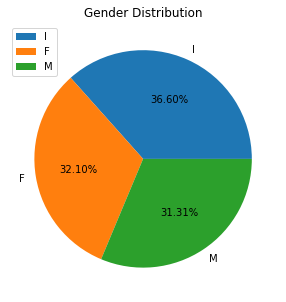

In [ ]:
cnt = data.Sex.value_counts()
print(cnt)
fig = plt.figure(figsize = (5,5))
plt.pie(cnt,labels = set(data["Sex"]),autopct='%1.2f%%')
# plt.pie(cnt,labels = set(data["Sex"]),autopct=lambda p:f'{p*sum(cnt)/100 :.0f}')
plt.title('Gender Distribution');
plt.legend()
plt.show()

## Histogram

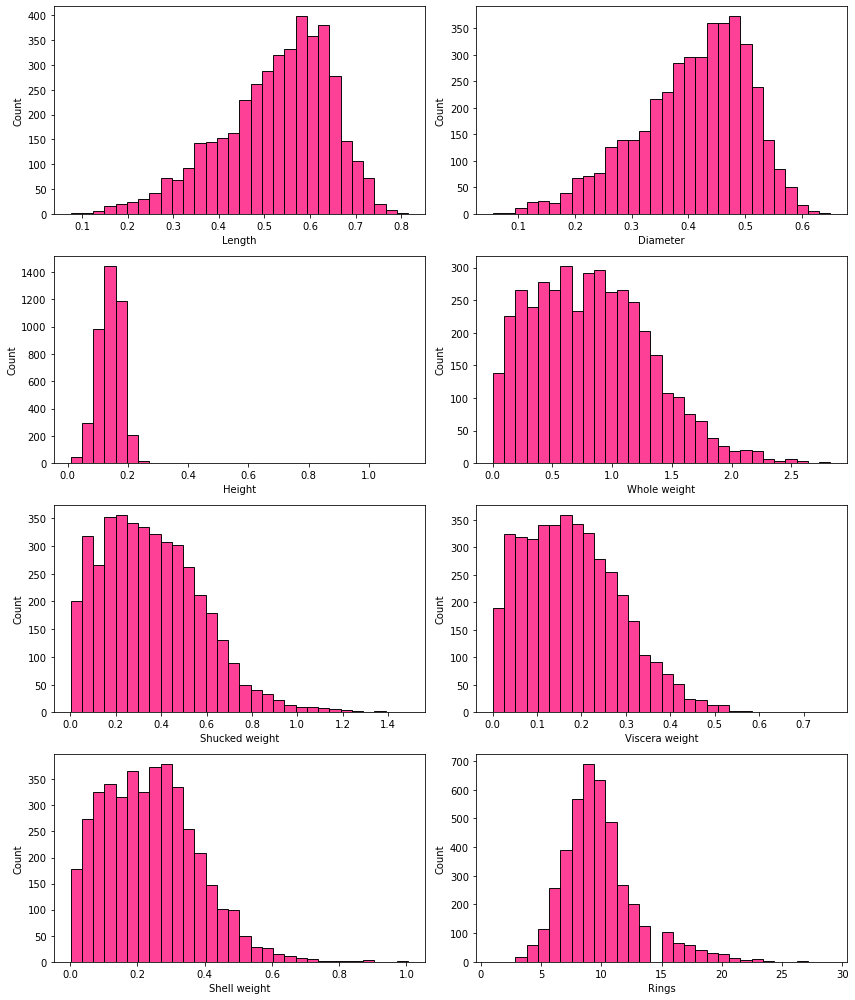

In [ ]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
sns.histplot(data=data.Length, bins=30, color='#FF0075')

plt.subplot(4,2,2)
sns.histplot(data=data.Diameter, bins=30, color='#FF0075')

plt.subplot(4,2,3)
sns.histplot(data=data.Height, bins=30, color='#FF0075')

plt.subplot(4,2,4)
sns.histplot(data=data["Whole weight"], bins=30, color='#FF0075')

plt.subplot(4,2,5)
sns.histplot(data=data["Shucked weight"], bins=30, color='#FF0075')

plt.subplot(4,2,6)
sns.histplot(data=data["Viscera weight"], bins=30, color='#FF0075')

plt.subplot(4,2,7)
sns.histplot(data=data["Shell weight"], bins=30, color='#FF0075')

plt.subplot(4,2,8)
sns.histplot(data=data["Rings"], bins=30, color='#FF0075')

plt.tight_layout()

From the above histograms we can conclude that there are possible outliers in Height and that there might be a strong relationship between the Diameter and Lenght and between Shell weight, Shucked weight, Viscera weight and Whole weight.

## Dist Plot

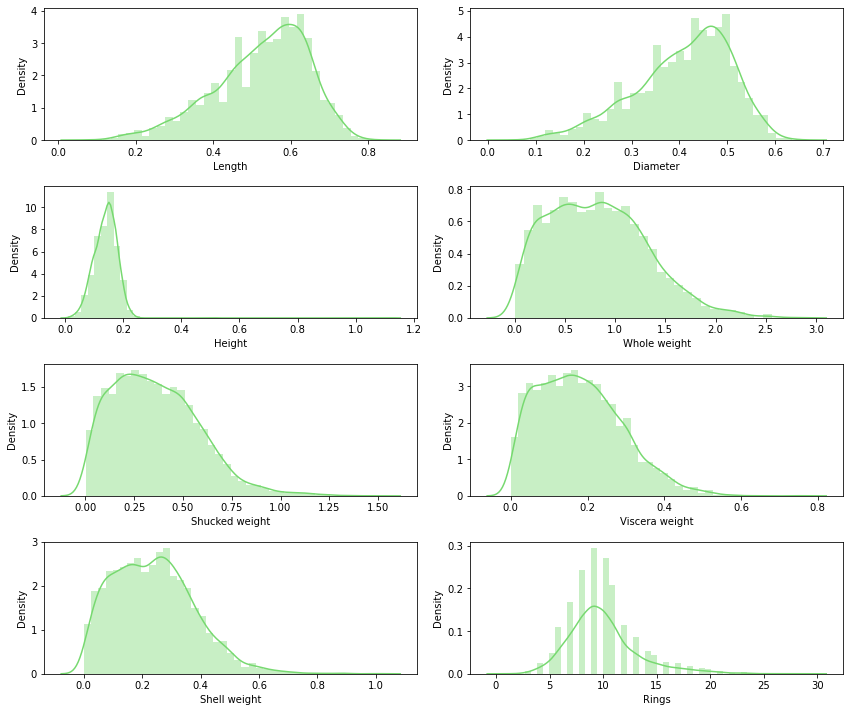

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(4,2,1)
sns.distplot(data.Length,color="#77D970")

plt.subplot(4,2,2)
sns.distplot(data.Diameter,color="#77D970")

plt.subplot(4,2,3)
sns.distplot(data.Height,color="#77D970")

plt.subplot(4,2,4)
sns.distplot(data["Whole weight"],color="#77D970") 

plt.subplot(4,2,5)
sns.distplot(data["Shucked weight"],color="#77D970")

plt.subplot(4,2,6)
sns.distplot(data["Viscera weight"],color="#77D970")

plt.subplot(4,2,7)
sns.distplot(data["Shell weight"],color="#77D970")

plt.subplot(4,2,8)
sns.distplot(data.Rings,color="#77D970")

plt.tight_layout()

In [ ]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy

,Features,Skewness degree
0,Length,-0.640763
1,Diameter,-0.609962
2,Height,3.165226
3,Whole weight,0.530358
4,Shucked weight,0.718477
5,Viscera weight,0.591243
6,Shell weight,0.620857
7,Rings,1.113354


skewness = 0 : normally distributed.<br>
skewness > 0 : more weight in the left tail of the distribution.<br>
skewness < 0 : more weight in the right tail of the distribution.

In Abalone data, Height has highest skewness value followed by Rings.<br>
High skewness in these feature may be an outcome of outliers. We will investigate it further using box and scatter plots.

## Box plot

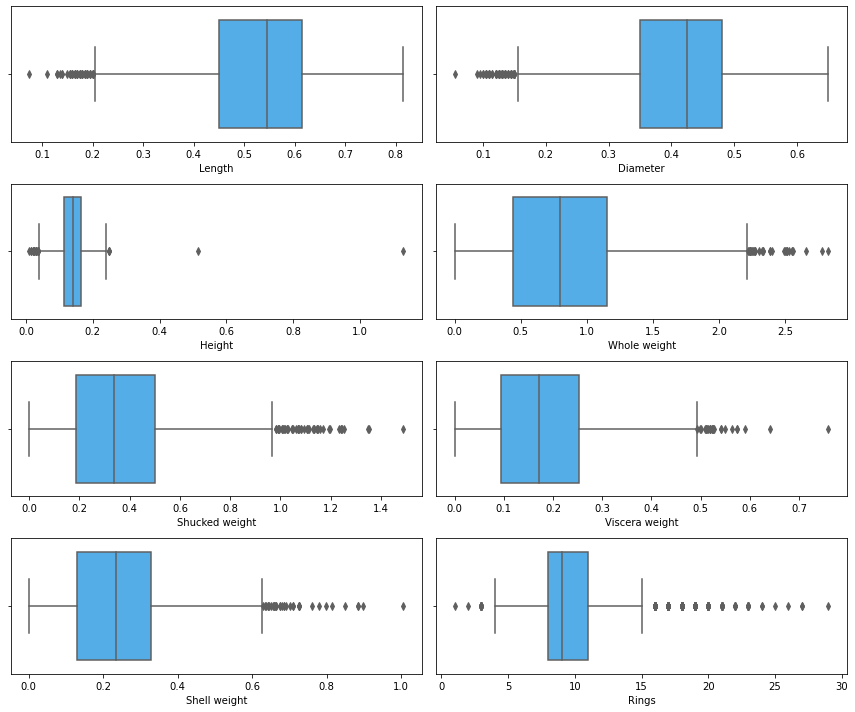

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(4,2,1)
sns.boxplot(x=data.Length,color='#3DB2FF')

plt.subplot(4,2,2)
sns.boxplot(x=data.Diameter,color='#3DB2FF')

plt.subplot(4,2,3)
sns.boxplot(x=data.Height,color='#3DB2FF')

plt.subplot(4,2,4)
sns.boxplot(x=data["Whole weight"],color='#3DB2FF') 

plt.subplot(4,2,5)
sns.boxplot(x=data["Shucked weight"],color='#3DB2FF')

plt.subplot(4,2,6)
sns.boxplot(x=data["Viscera weight"],color='#3DB2FF')

plt.subplot(4,2,7)
sns.boxplot(x=data["Shell weight"],color='#3DB2FF')

plt.subplot(4,2,8)
sns.boxplot(x=data.Rings,color='#3DB2FF')

plt.tight_layout()

The above box plot confirms that there are outliers in the height attribute and removing them would be efficient for training our model.

In [ ]:
#data = data[data.Height < 0.4]
#plt.figure(figsize=(8,4))
#sns.boxplot(x=data.Height,color='#3DB2FF')

We will investigate the outliers in other attributes while analysing the scatter plot.

# Multivariate Analysis

## Correlation

In [ ]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

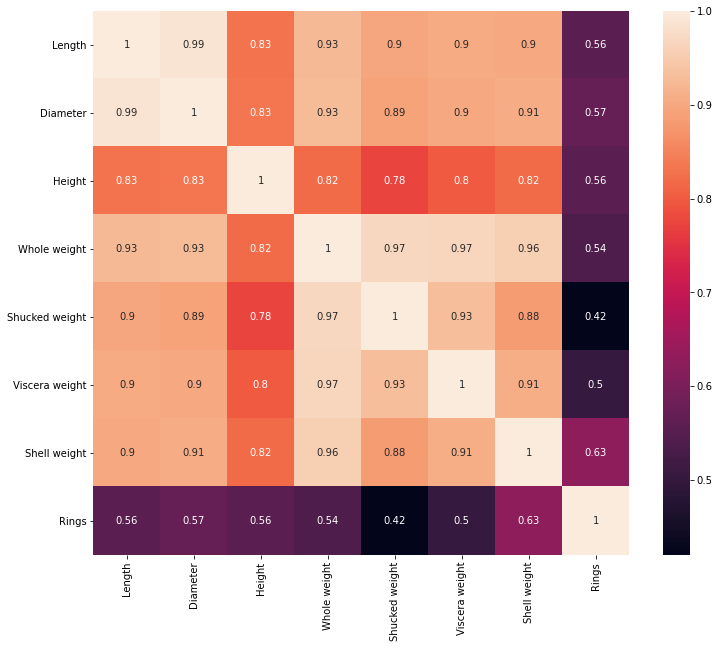

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.corr().Rings.sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627928
Diameter          0.574418
Height            0.557625
Length            0.556464
Whole weight      0.540151
Viscera weight    0.503562
Shucked weight    0.420597
Name: Rings, dtype: float64

From above correlation matrix we can conclude that rings feature has the highest correlation with Shell Weight while the lowest with Shucked Weight.

## Box plot

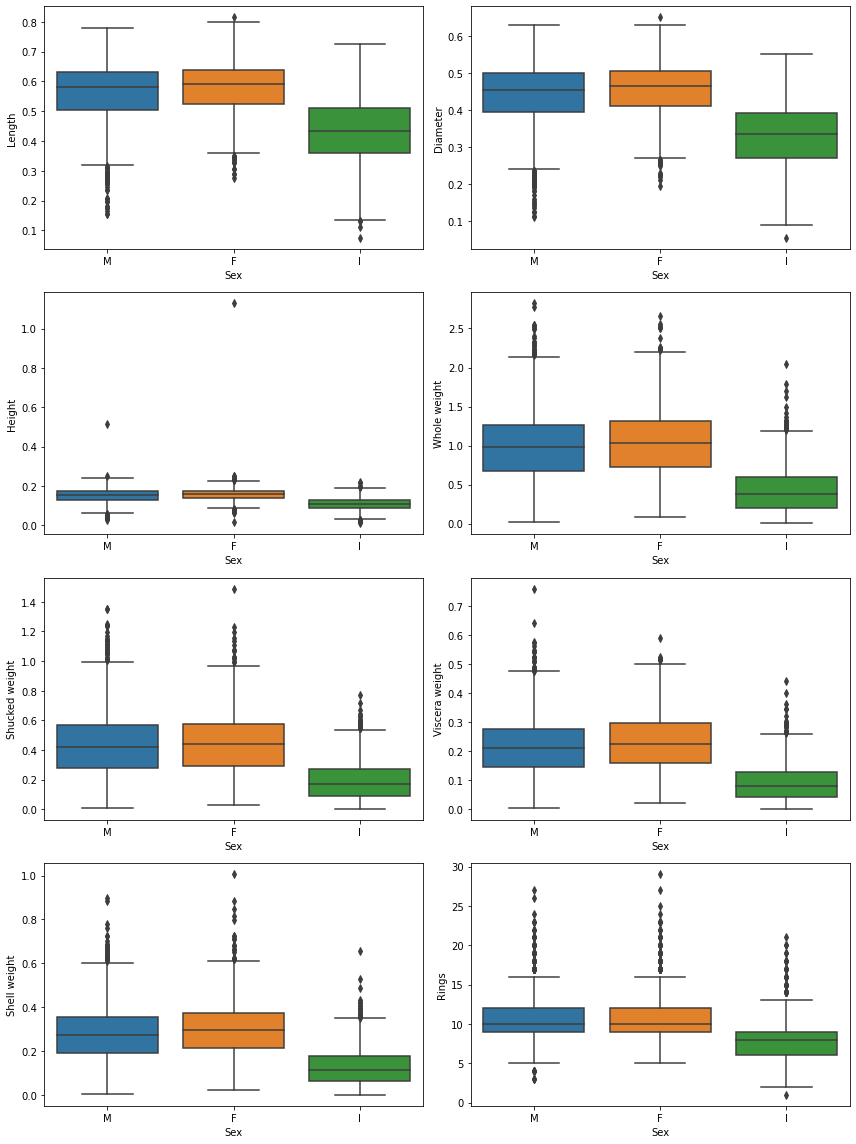

In [ ]:
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
sns.boxplot(data= data, x = 'Sex', y = 'Length')

plt.subplot(4,2,2)
sns.boxplot(data= data, x = 'Sex', y = 'Diameter')

plt.subplot(4,2,3)
sns.boxplot(data= data, x = 'Sex', y = 'Height')

plt.subplot(4,2,4)
sns.boxplot(data= data, x = 'Sex', y = 'Whole weight')

plt.subplot(4,2,5)
sns.boxplot(data= data, x = 'Sex', y = 'Shucked weight')

plt.subplot(4,2,6)
sns.boxplot(data= data, x = 'Sex', y = 'Viscera weight')

plt.subplot(4,2,7)
sns.boxplot(data= data, x = 'Sex', y = 'Shell weight')

plt.subplot(4,2,8)
sns.boxplot(data= data, x = 'Sex', y = 'Rings')

plt.tight_layout()

We observe that the median of Rings for the I category is lower than the median for M and F categories.

## Scatter Plot

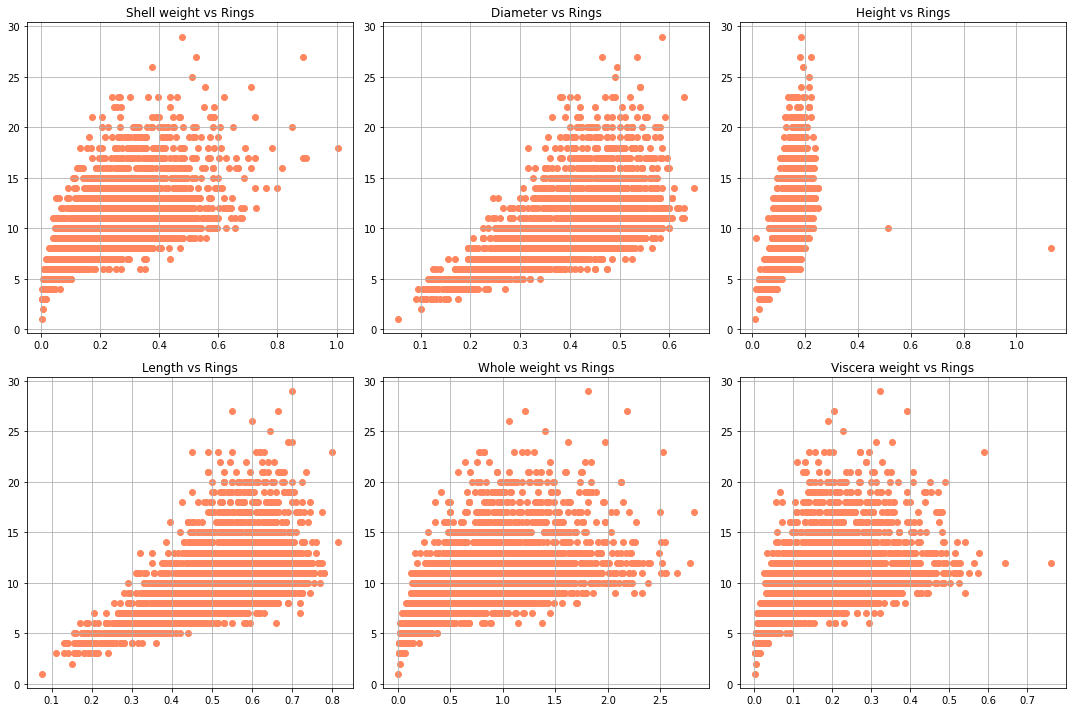

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(data['Shell weight'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.subplot(2,3,2)
plt.title('Diameter vs Rings')
plt.scatter(data['Diameter'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.subplot(2,3,3)
plt.title('Height vs Rings')
plt.scatter(data['Height'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.subplot(2,3,4)
plt.title('Length vs Rings')
plt.scatter(data['Length'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.subplot(2,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(data['Whole weight'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.subplot(2,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(data['Viscera weight'],data['Rings'],color='#FF865E')
plt.grid(True)

plt.tight_layout()

In [ ]:
#removing outliers from Viscera weight
#data.drop(data[(data['Viscera weight'] > 0.6) & (data['Rings'] < 15)].index, inplace=True)
#data.drop(data[(data['Viscera weight'] < 0.6) & (data['Rings'] > 25)].index, inplace=True)

In [ ]:
#removing outliers from Shell weight
#data.drop(data[(data['Shell weight'] > 0.8) & (data['Rings'] < 30)].index, inplace=True)
#data.drop(data[(data['Shell weight'] < 0.8) & (data['Rings'] > 25)].index, inplace=True)

## Pair plot

<Figure size 864x720 with 0 Axes>

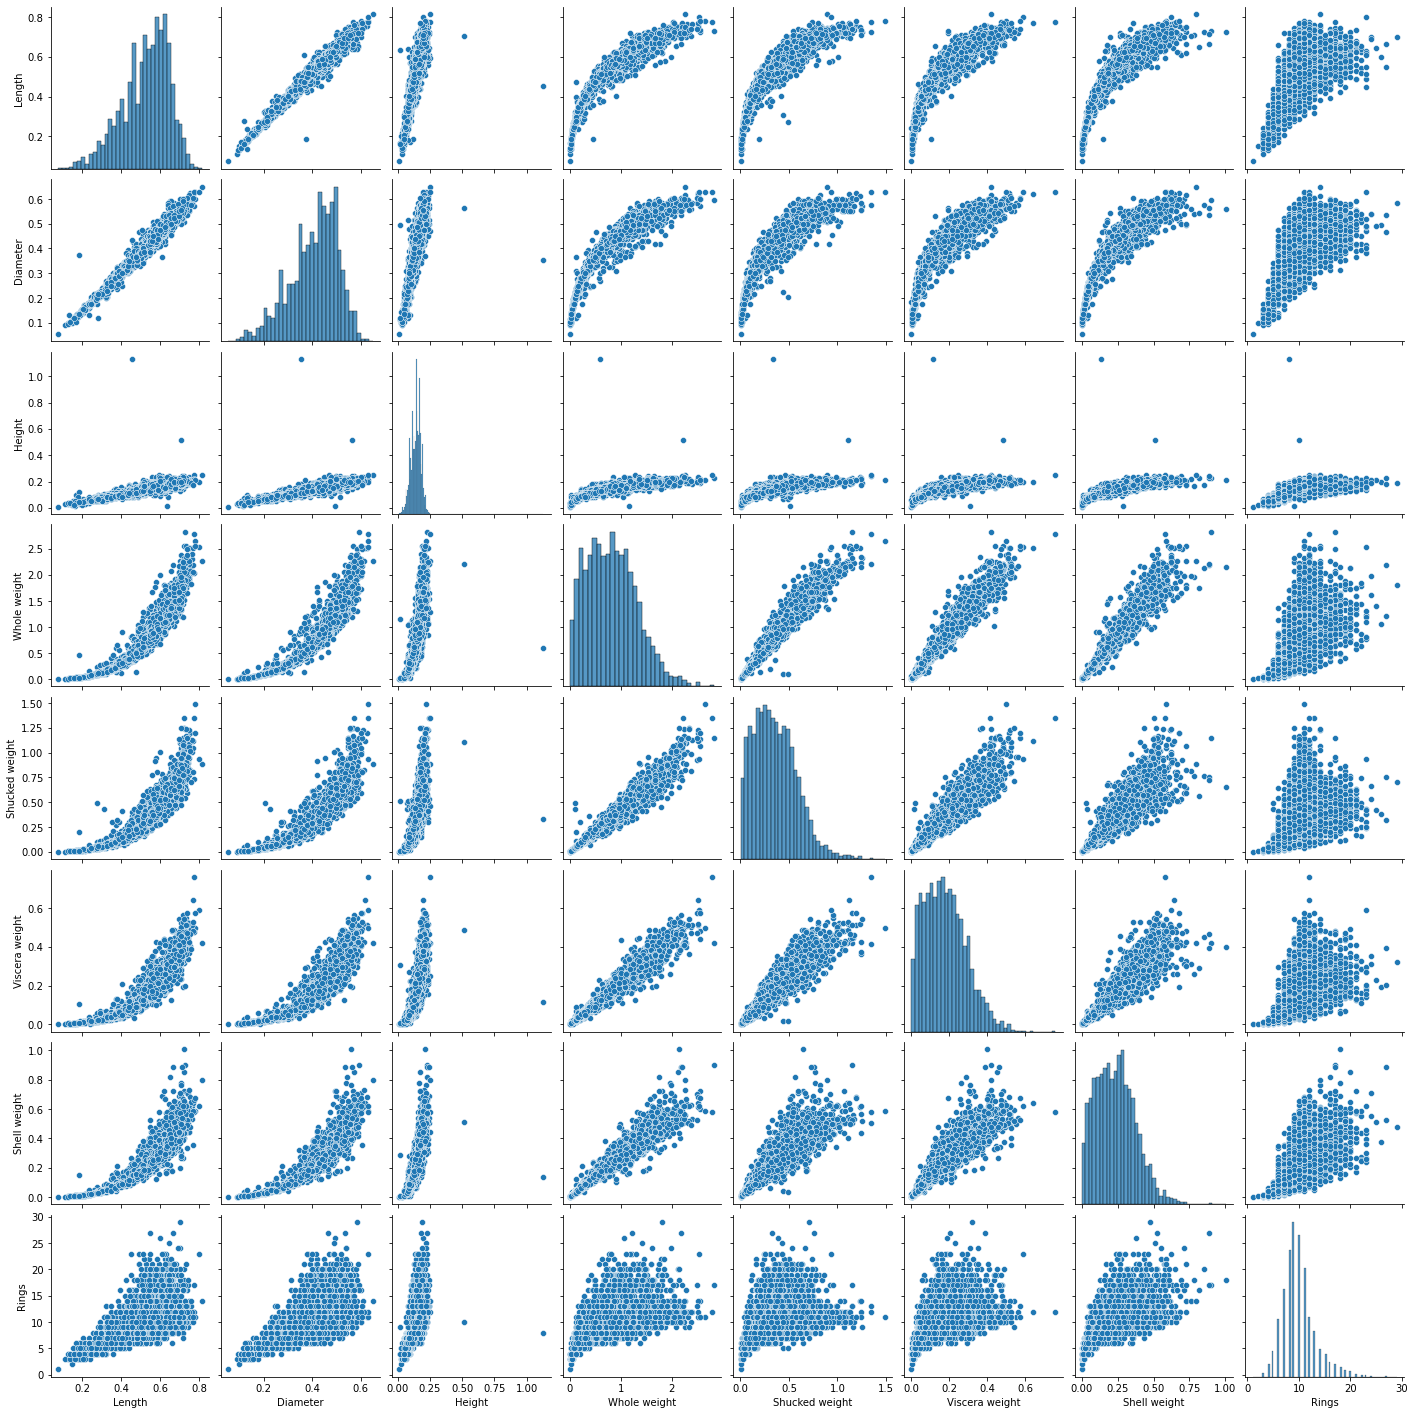

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(data)

# 4. Regression

In [ ]:
data1 = data.copy()
data1.Sex = data1.Sex.map({'M':0, 'F':1, 'I':2})
data1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data1['Age'] = data1['Rings'] + 1.5
data1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [ ]:
X = data1.drop(['Rings','Age'], axis=1).values
y = data1['Age'].values

In [ ]:
X

array([[0.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [0.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [ ]:
y

array([16.5,  8.5, 10.5, ..., 10.5, 11.5, 13.5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression

In [ ]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
y_pred = Linear_model.predict(X_test)

In [ ]:
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2-Score of linear regression: ",linear_r2)
print("Mean Absolute Error of linear regression: ",linear_mae)
print("Mean Squared Error of linear regression: ",linear_mse)
print("Root Mean Squared Error of linear regression: ",linear_rmse)

R2-Score of linear regression:  0.5746148475159661
Mean Absolute Error of linear regression:  1.6288982373588832
Mean Squared Error of linear regression:  5.110438117950186
Root Mean Squared Error of linear regression:  2.260627814999671


## Decision Tree Regressor

In [ ]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [ ]:
DT_mae = mean_absolute_error(y_test, y_pred)
DT_mse = mean_squared_error(y_test, y_pred)
DT_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error of decision tree regression: ",DT_mae)
print("Mean Squared Error of decision tree regression: ",DT_mse)
print("Root Mean Squared Error of decision tree regression: ",DT_rmse)

Mean Absolute Error of decision tree regression:  0.3014354066985646
Mean Squared Error of decision tree regression:  0.3014354066985646
Root Mean Squared Error of decision tree regression:  0.5490313348968022


## Random Forest Regressor

In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [ ]:
RF_mae = mean_absolute_error(y_test, y_pred)
RF_mse = mean_squared_error(y_test, y_pred)
RF_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error of random forest regression: ",RF_mae)
print("Mean Squared Error of random forest regression: ",RF_mse)
print("Root Mean Squared Error of random forest regression: ",RF_rmse)

Mean Absolute Error of random forest regression:  0.29626794258373207
Mean Squared Error of random forest regression:  0.16597416267942583
Root Mean Squared Error of random forest regression:  0.40739926691076145


## K-Nearest Neighbor Regressor

In [ ]:
knn_model = KNeighborsRegressor()
parameters = {"n_neighbors": range(2, 40),
              "weights": ["uniform", "distance"]}

gridsearch_knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)
best_k = gridsearch_knn.best_params_["n_neighbors"]
best_weights = gridsearch_knn.best_params_["weights"]
gridsearch_knn.best_params_


{'n_neighbors': 16, 'weights': 'distance'}

In [ ]:

knn_model = KNeighborsRegressor(n_neighbors=best_k,weights = best_weights)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


In [ ]:

knn_mae = mean_absolute_error(y_test, y_pred)
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error of knn regression: ",knn_mae)
print("Mean Squared Error of knn regression: ",knn_mse)
print("Root Mean Squared Error of knn regression: ",knn_rmse)


Mean Absolute Error of knn regression:  0.2878174457121826
Mean Squared Error of knn regression:  0.14968432377339264
Root Mean Squared Error of knn regression:  0.38689058372283064


## Support Vector Regression

In [ ]:

SVR_model = SVR()  
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly', 'rbf', 'sigmoid','linear']}
grid = GridSearchCV(SVR(), param_grid) 
grid.fit(X_train,y_train)
best_c = grid.best_params_['C']
best_g = grid.best_params_['gamma']
best_k = grid.best_params_['kernel']
grid.best_params_


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:

SVR_model = SVR(C=best_c, gamma=best_g, kernel=best_k)
SVR_model.fit(X_train, y_train)
y_pred = SVR_model.predict(X_test)


In [ ]:

SVR_mae = mean_absolute_error(y_test, y_pred)
SVR_mse = mean_squared_error(y_test, y_pred)
SVR_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error of support vector regression: ",SVR_mae)
print("Mean Squared Error of support vector regression: ",SVR_mse)
print("Root Mean Squared Error of support vector regression: ",SVR_rmse)


Mean Absolute Error of support vector regression:  0.2586321526528531
Mean Squared Error of support vector regression:  0.14442414072699747
Root Mean Squared Error of support vector regression:  0.38003176278700374


# 5. Classification

In [ ]:
data2 = data.copy()
data2.Sex = data2.Sex.map({'M':0, 'F':1, 'I':2})
data2['Age'] = data2['Rings'] + 1.5
data2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [ ]:
mean_age = np.mean(data2['Age'])
median_age = np.median(data2['Age'])
print(mean_age)
print(median_age)

11.43508982035928
10.5


In [ ]:
bins = [0,median_age,data2['Age'].max()]
group_names = ['young','old']
data2['Age'] = pd.cut(data2['Age'],bins, labels = group_names)
data2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,old
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,young
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,young
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,old
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,young
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,old
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,old
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,young
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,old


In [ ]:
data2['Age'] = data2['Age'].map({'young':0, 'old':1})
data2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [ ]:
X = data2.drop(['Rings','Age'], axis=1).values
y = data2['Age'].values

In [ ]:
X

array([[0.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [0.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [ ]:
y

[1, 0, 0, 1, 0, ..., 1, 1, 0, 1, 1]
Length: 4175
Categories (2, int64): [0 < 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

NameError: ignored

In [ ]:
LR_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",LR_acc)
print('\n-------------------- Classification Report of: Logistic Regression--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: Logistic Regression-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(LR_model,X_test, y_test, cmap=plt.cm.RdPu))

## Support Vector Classifier

In [ ]:

SVC_model = SVC()  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly', 'rbf', 'sigmoid','linear']}
grid = GridSearchCV(SVC(), param_grid) 
grid.fit(X_train,y_train)
best_c = grid.best_params_['C']
best_g = grid.best_params_['gamma']
best_k = grid.best_params_['kernel']
grid.best_params_


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:

SVC_model = SVC(C=best_c, gamma=best_g, kernel=best_k)
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)



Accuracy:  0.8086124401913876

-------------------- Classification Report of: SVC--------------------

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       203
           1       0.81      0.82      0.81       215

    accuracy                           0.81       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.81      0.81      0.81       418


---------------------- Confusion matrix of: SVC-----------------------

[[162  41]
 [ 39 176]]


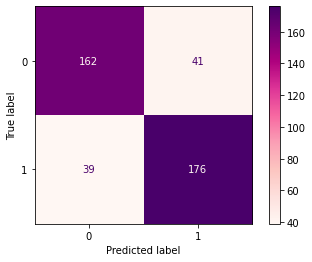

In [ ]:

svc_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",svc_acc)
print('\n-------------------- Classification Report of: SVC--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: SVC-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(SVC_model,X_test, y_test, cmap=plt.cm.RdPu))


## Decision Tree Classifier

In [ ]:

DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
y_pred = DTC_model.predict(X_test)



Accuracy:  0.6985645933014354

-------------------- Classification Report of: DTC--------------------

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       203
           1       0.72      0.67      0.70       215

    accuracy                           0.70       418
   macro avg       0.70      0.70      0.70       418
weighted avg       0.70      0.70      0.70       418


---------------------- Confusion matrix of: DTC-----------------------

[[147  56]
 [ 70 145]]


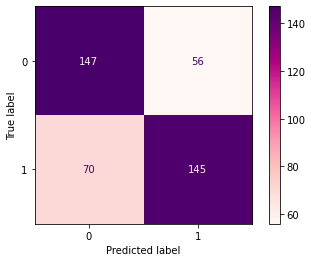

In [ ]:

dtc_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",dtc_acc)
print('\n-------------------- Classification Report of: DTC--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: DTC-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(DTC_model,X_test, y_test, cmap=plt.cm.RdPu))


## Random Forest Classifier

In [ ]:

RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)
y_pred = RFC_model.predict(X_test)



Accuracy:  0.7703349282296651

-------------------- Classification Report of: RFC--------------------

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       203
           1       0.77      0.78      0.78       215

    accuracy                           0.77       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.77      0.77      0.77       418


---------------------- Confusion matrix of: RFC-----------------------

[[154  49]
 [ 47 168]]


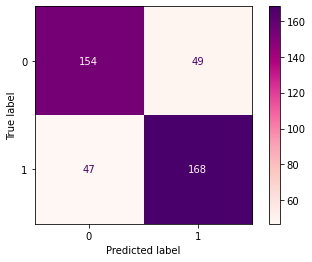

In [ ]:

rfc_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",rfc_acc)
print('\n-------------------- Classification Report of: RFC--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: RFC-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(RFC_model,X_test, y_test, cmap=plt.cm.RdPu))

## K-Nearest Neighbors

In [ ]:
KNN_model = KNeighborsClassifier()
parameters = {"n_neighbors": range(2, 40),
              "weights": ["uniform", "distance"]}

gridsearch_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)
best_k = gridsearch_knn.best_params_["n_neighbors"]
best_weights = gridsearch_knn.best_params_["weights"]
gridsearch_knn.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=best_k,weights = best_weights)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)


Accuracy:  0.7799043062200957

-------------------- Classification Report of: KNN--------------------

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       203
           1       0.78      0.80      0.79       215

    accuracy                           0.78       418
   macro avg       0.78      0.78      0.78       418
weighted avg       0.78      0.78      0.78       418


---------------------- Confusion matrix of: KNN-----------------------

[[153  50]
 [ 42 173]]


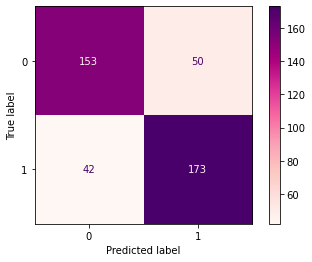

In [ ]:
KNN_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",KNN_acc)
print('\n-------------------- Classification Report of: KNN--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: KNN-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(KNN_model,X_test, y_test, cmap=plt.cm.RdPu))

## Gaussian Naive Bayes

In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
y_pred = GNB_model.predict(X_test)


Accuracy:  0.7368421052631579

-------------------- Classification Report of: Gaussian Naive Bayes--------------------

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       203
           1       0.73      0.78      0.75       215

    accuracy                           0.74       418
   macro avg       0.74      0.74      0.74       418
weighted avg       0.74      0.74      0.74       418


---------------------- Confusion matrix of: Gaussian Naive Bayes-----------------------

[[141  62]
 [ 48 167]]


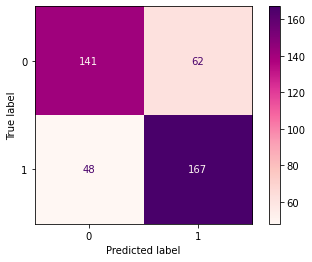

In [ ]:
GNB_acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ",GNB_acc)
print('\n-------------------- Classification Report of: Gaussian Naive Bayes--------------------\n')
print(metrics.classification_report(y_test,y_pred))
print('\n---------------------- Confusion matrix of: Gaussian Naive Bayes-----------------------\n')
print(metrics.confusion_matrix(y_test,y_pred))
print(plot_confusion_matrix(GNB_model,X_test, y_test, cmap=plt.cm.RdPu))

# 6. Conclusion

| Regressor | RMSE |
| :- | :- |
| Linear Regression | 2.260 |
| Decision Tree Regressor | 0.549 |
| Random Forest Regressor | 0.407 |
| K-Nearest Neighbor Regrossor | 0.386 |
| Support Vector Regressor | 0.380 |

| Classifier | Accuracy |
| :- | :- |
| Logistic Regression | 79.18 |
| Support Vector Classifier | 80.86 |
| Decision Tree Classifier | 69.85 |
| Random Forest Classifier | 77.03 |
| K-Nearest Neighbor Classifier | 77.99 |
| Gaussian Naive Bayes | 73.68 | 

Through our study, we conclude Support Vector Machines performed best in our regression task of predicting the Abalone age as well as in our binary classification task.